<h1 align="center"> QBraid's QuBes course </h1>
<h2 align="center"> Multi-qubit gates, Measurements and Gates </h1>
<h3 align="center"> Luka Nedimović </h1>

<hr/>

In [63]:
from qiskit import QuantumCircuit
example_circ = QuantumCircuit(2)
example_circ.h([0,1])
example_circ.cx(0,1)
example_circ.h([0,1])

<hr/>

<h2 align="center"> Free response </h2>

<h4> 1. We saw in the lesson that in order to create the first bell state $ \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, you apply a Hadamard gate to the first qubit, and then apply a CNOT gate with the first qubit as the control and second qubit as the target. <br/> 
Try to design a quantum circuit that will implement the other three bell states: $ \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle), \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle),$ and $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$ .
</h4>

<h4> Solution: </h4>

In [54]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

#simulator for checking qubit states later on
simulator = Aer.get_backend('statevector_simulator')


#circuit for second bell state
bell_state_2 = QuantumCircuit(2)

#circuit for third bell state
bell_state_3 = QuantumCircuit(2)

#circuit for fourth bell state
bell_state_4 = QuantumCircuit(2)

#write your code here for bell_state_2:
bell_state_2.h(0)
bell_state_2.cx(0, 1)
bell_state_2.z(0)

#write your code here for bell_state_3:
bell_state_3.h(0)
bell_state_3.cx(0, 1)
bell_state_3.x(1)

#write your code here for bell_state_4:
bell_state_4.h(0)
bell_state_4.cx(0, 1)
bell_state_4.z(0)
bell_state_4.x(1)

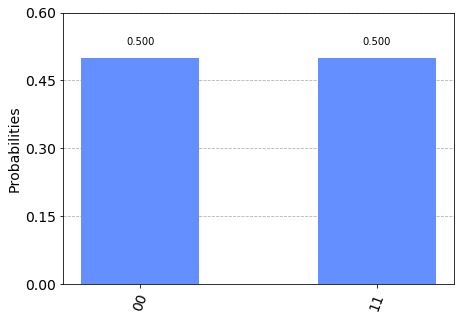

In [55]:
#run check for bell_state_2
qobj2 = assemble(bell_state_2)
result2 = simulator.run(qobj2).result()
counts2 = result2.get_counts()
plot_histogram(counts2)

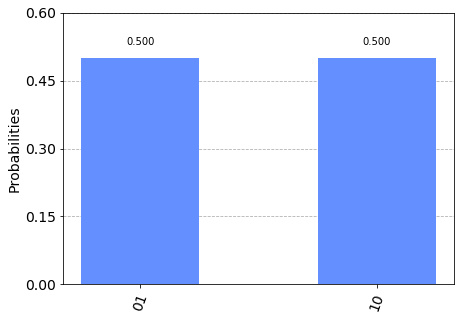

In [56]:
#run check for bell_state_3
qobj3 = assemble(bell_state_3)
result3 = simulator.run(qobj3).result()
counts3 = result3.get_counts()
plot_histogram(counts3)

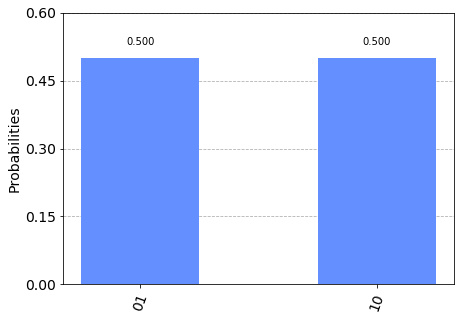

In [57]:
#run check for bell_state_4
qobj4 = assemble(bell_state_4)
result4 = simulator.run(qobj4).result()
counts4 = result4.get_counts()
plot_histogram(counts4)

<h4> 2. It is often the case that many algorithms start by initializing the state of certain qubits to a few common states, other than the $\left|0 \right\rangle$ or $\left|1 \right\rangle$ states. For example, two other common states are: 
$$ |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$
These states are referred to as Hadamard basis states, because they are created using just one application of a Hadamard gate. Try implementing the following two-qubit states:
<ul>
    <li> 1: $ |+\rangle|0\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle $ </li>
    <li> 2: $ |0\rangle|-\rangle = \frac{1}{\sqrt{2}}|00\rangle - \frac{1}{\sqrt{2}}|01\rangle $ </li>
    <li> 3: $ |1\rangle|+\rangle = \frac{1}{\sqrt{2}}|10\rangle + \frac{1}{\sqrt{2}}|11\rangle $ </li>
    <li> 4: $ |+\rangle|+\rangle = \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle $ </li>
    <li> 5: $ |+\rangle|-\rangle = \frac{1}{2}|00\rangle - \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle - \frac{1}{2}|11\rangle$ </li>
</ul>
To check your answers, verify that the outcomes you obtain when measuring the states you prepared match what you'd expect.
</h4>

<h4> Solution: </h4>

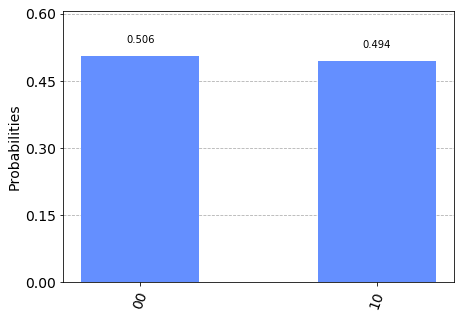

In [58]:
# Circuit 1 
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.h(0)

#execute the circuit to get measurement probabilities
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
plot_histogram(counts)
# circ.draw("mpl")

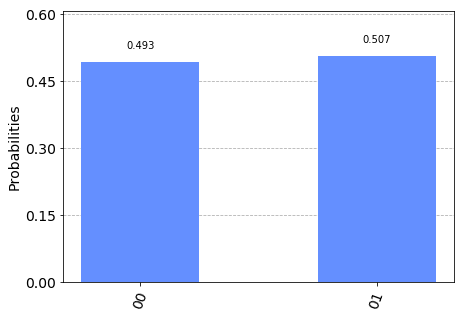

In [59]:
# Circuit 2 
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.x(1)
circ.h(1)

#execute the circuit to get measurement probabilities
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
plot_histogram(counts)
# circ.draw("mpl")

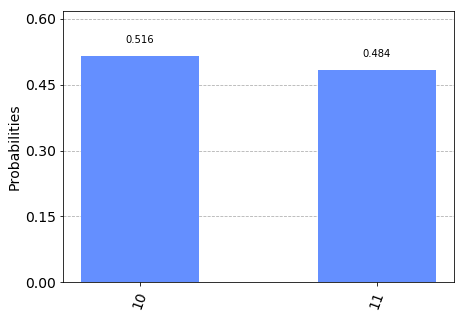

In [60]:
# Circuit 3 
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.x(0)
circ.h(1)

#execute the circuit to get measurement probabilities
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
plot_histogram(counts)
# circ.draw("mpl")

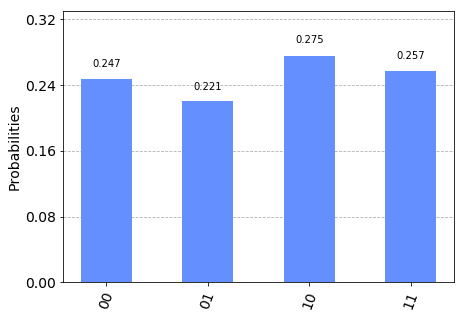

In [61]:
# Circuit 4 
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.h(0)
circ.h(1)

#execute the circuit to get measurement probabilities
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
plot_histogram(counts)
# circ.draw("mpl")

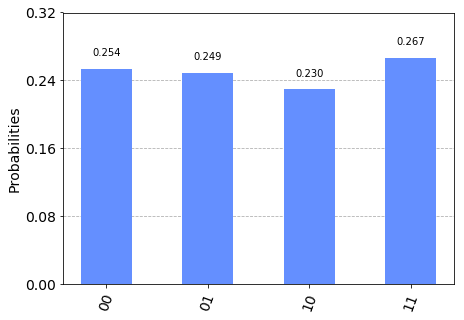

In [62]:
# Circuit 5 
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.h(0)
circ.x(1)
circ.h(1)

#execute the circuit to get measurement probabilities
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
plot_histogram(counts)
# circ.draw("mpl")

<h4> 3. Sometimes, experimental quantum computing architectures are not universal. It might be the case that they can only apply CNOT gates in one direction. For example, they can use qubit 00 as the control and qubit 11 as the target, but not viceversa.
What two qubit gate does the following two-qubit circuit implement? </h4>

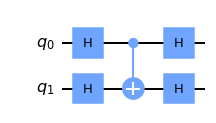

In [64]:
example_circ.draw("mpl")

<h4> Test its action on the standard basis elements: $ |00\rangle, |01\rangle, |10\rangle$ and $|11\rangle$ </h4>

<h4> Solution: </h4>

In [65]:
# |00>
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
# Nothing to prepare

#implement circuit
circ.h([0,1])
circ.cx(0,1)
circ.h([0,1])

#execute the circuit
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
for i,j in counts.items():
    print("|{}>: ".format(i), Fraction(j/1024).limit_denominator(4))

|00>:  1


In [66]:
# |01>
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.x(1)

#implement circuit
circ.h([0,1])
circ.cx(0,1)
circ.h([0,1])

#execute the circuit
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
for i,j in counts.items():
    print("|{}>: ".format(i), Fraction(j/1024).limit_denominator(4))

|11>:  1


In [67]:
# |10>
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.x(0)

#implement circuit
circ.h([0,1])
circ.cx(0,1)
circ.h([0,1])

#execute the circuit
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
for i,j in counts.items():
    print("|{}>: ".format(i), Fraction(j/1024).limit_denominator(4))

|10>:  1


In [68]:
# |11>
from qiskit import QuantumCircuit, Aer, execute
from fractions import Fraction
circ=QuantumCircuit(2,2)

#prepare the initial state
circ.x([0,1])

#implement circuit
circ.h([0,1])
circ.cx(0,1)
circ.h([0,1])

#execute the circuit
circ.measure([0,1],[1,0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
counts = sim.result().get_counts(circ)
for i,j in counts.items():
    print("|{}>: ".format(i), Fraction(j/1024).limit_denominator(4))

|01>:  1


<h4> Conclusion: This is an example of reversed CNOT gate - control qubit is $q_1$ and target qubit is $q_0$ </h4>

<hr/>